<a href="https://colab.research.google.com/github/usm-cos422-522/courseMaterials/blob/main/Lectures/timeseries-analysis-and-climate-change-exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series Analysis and Climate Change

Notebook adapted from https://towardsdatascience.com/time-series-analysis-and-climate-change-7bb4371021e
   Changes to fit techniques learned in this class

In [12]:
import pandas as pd
import numpy as np
from datetime import datetime
from pandas.tseries.offsets import MonthEnd
from pandas.tseries.offsets import YearEnd
import matplotlib.pyplot as plt
%matplotlib inline

# Pulling the data

In [13]:
# Read in the raw temperature and emissions datasets (they are in CSV format) 
# raw_t : An estimate of global surface temperature change
#      https://data.giss.nasa.gov/gistemp/
# raw_e : An estimate of CO₂ emissions, in metric tons per capita, from the World Bank 
#      https://data.worldbank.org/indicator/EN.ATM.CO2E.PC 
#      https://data.worldbank.org/indicator/EN.ATM.CO2E.KT   ... this file is total CO2 (more depressing)
temp_url = 'https://raw.githubusercontent.com/usm-cos422-522/courseMaterials/main/data/GLB.Ts%2BdSST.csv'
emission_url= 'https://raw.githubusercontent.com/usm-cos422-522/courseMaterials/main/data/API_EN.ATM.CO2E.PC_DS2_en_csv_v2_3159114.csv'
raw_t = pd.read_csv(temp_url, skiprows=1)
raw_e = pd.read_csv(emission_url, skiprows=3)

In [14]:
# Investigate how the raw data looks
raw_t.tail()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,J-D,D-N,DJF,MAM,JJA,SON
135,2015,0.81,0.87,0.90,0.75,0.75,0.79,0.71,.79,.82,1.07,1.03,1.10,.87,.84,.82,0.80,.77,.97
136,2016,1.15,1.35,1.31,1.07,0.91,0.77,0.82,1.00,.88,.90,.91,.83,.99,1.01,1.20,1.10,.86,.89
137,2017,0.98,1.13,1.13,0.92,0.89,0.70,0.82,.87,.76,.88,.86,.89,.90,.90,.98,0.98,.80,.83
138,2018,0.77,0.85,0.91,0.87,0.81,0.74,0.78,.73,.76,.99,.78,.89,.82,.82,.84,0.86,.75,.84
139,2019,0.87,0.92,1.11,0.97,0.85,0.86,0.90,***,***,***,***,***,***,***,.89,0.98,***,***


# Wrangling Time Series Data

## Wrangling Temperature

In [15]:
# We only want the monthly data, lets only select that and leave out the seasonal columns 
raw_t = raw_t.iloc[:,:13]
raw_t.head()

,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1880,-0.29,-0.18,-0.11,-0.20,-0.12,-0.23,-0.21,-.09,-.16,-.23,-.20,-.23
1,1881,-0.16,-0.17,0.04,0.04,0.02,-0.20,-0.07,-.03,-.14,-.21,-.22,-.11
2,1882,0.14,0.15,0.03,-0.19,-0.16,-0.26,-0.21,-.06,-.10,-.25,-.16,-.25
3,1883,-0.32,-0.39,-0.13,-0.17,-0.20,-0.13,-0.08,-.15,-.21,-.14,-.22,-.16
4,1884,-0.16,-0.08,-0.37,-0.43,-0.37,-0.41,-0.35,-.26,-.27,-.24,-.30,-.29


In [16]:
raw_t1 = raw_t.set_index('Year')
print(raw_t1.head())
raw_t2 = raw_t1.stack()
print(raw_t2.head())
print(raw_t2.index[1])

       Jan   Feb   Mar   Apr   May   Jun   Jul   Aug   Sep   Oct   Nov   Dec
Year                                                                        
1880 -0.29 -0.18 -0.11 -0.20 -0.12 -0.23 -0.21  -.09  -.16  -.23  -.20  -.23
1881 -0.16 -0.17  0.04  0.04  0.02 -0.20 -0.07  -.03  -.14  -.21  -.22  -.11
1882  0.14  0.15  0.03 -0.19 -0.16 -0.26 -0.21  -.06  -.10  -.25  -.16  -.25
1883 -0.32 -0.39 -0.13 -0.17 -0.20 -0.13 -0.08  -.15  -.21  -.14  -.22  -.16
1884 -0.16 -0.08 -0.37 -0.43 -0.37 -0.41 -0.35  -.26  -.27  -.24  -.30  -.29
Year     
1880  Jan   -0.29
      Feb   -0.18
      Mar   -0.11
      Apr    -0.2
      May   -0.12
dtype: object
(1880, 'Feb')


In [17]:
#date_str = [str(raw_t2.index[i][0]) + "-" + raw_t2.index[i][1] for i in range(len(raw_t2))]
date_str = [str(raw_t2.index.get_level_values(0)[i]) + "-" + raw_t2.index.get_level_values(1)[i] for i in range(len(raw_t2))]
raw_t2.index = pd.to_datetime(date_str, format='%Y-%b') + MonthEnd()
raw_t2.head()

1880-01-31   -0.29
1880-02-29   -0.18
1880-03-31   -0.11
1880-04-30    -0.2
1880-05-31   -0.12
dtype: object

In [18]:
temp_chg = pd.DataFrame(raw_t2,columns=['Avg_Anomaly_deg_C'])
print(temp_chg.Avg_Anomaly_deg_C.dtype)
temp_chg.head()


object


,Avg_Anomaly_deg_C
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.2
1880-05-31,-0.12


In [19]:
# Import Numpy, as library meant for large arrays - we will use it that we 
import numpy as np

# Define function to convert values to floats, and return a 'NaN = Not a Number' if this is not possible
def clean_anomaly_value(raw_value):
    try:
        return float(raw_value)
    except:
        return np.NaN
    
# Apply above function to all anomaly values in DataFrame
temp_chg['Avg_Anomaly_deg_C'] = temp_chg['Avg_Anomaly_deg_C'].apply(lambda raw_value: clean_anomaly_value(raw_value))

# 'Forward fill' to take care of NaN values
temp_chg.fillna(method='ffill', inplace=True)

# Show the first few elements of our newly cleaned DataFrame
temp_chg.head()

,Avg_Anomaly_deg_C
1880-01-31,-0.29
1880-02-29,-0.18
1880-03-31,-0.11
1880-04-30,-0.20
1880-05-31,-0.12


In [31]:
#demonstrate access to data via index

print(temp_chg.loc['1880-01-31'])
print(temp_chg.loc['1880-01-31':'1890-01-31'])

Avg_Anomaly_deg_C   -0.29
Name: 1880-01-31 00:00:00, dtype: float64
            Avg_Anomaly_deg_C
1880-01-31              -0.29
1880-02-29              -0.18
1880-03-31              -0.11
1880-04-30              -0.20
1880-05-31              -0.12
...                       ...
1889-09-30              -0.22
1889-10-31              -0.22
1889-11-30              -0.33
1889-12-31              -0.30
1890-01-31              -0.44

[121 rows x 1 columns]


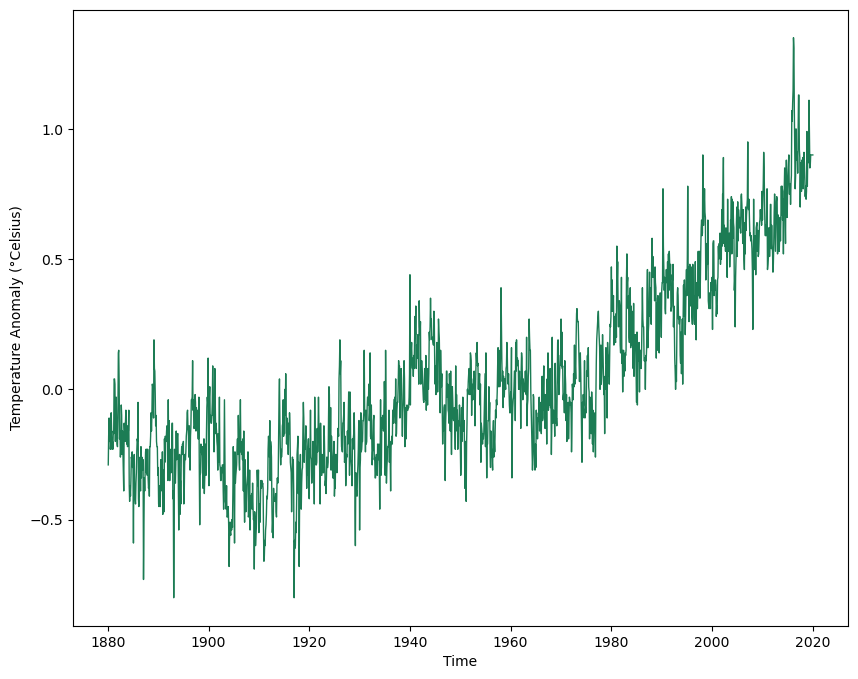

In [20]:
# Plot the data - quick and easy - using matplotlib, we will draw prettier graphs later

# Import Matplotlib
import matplotlib.pyplot as plt
# Allow for rendering within notebook
%matplotlib inline

# Create figure, title and plot data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(temp_chg, color='#1C7C54', linewidth=1.0)

In [21]:
# The data can be resampled to a different frequency, 
# lets resample it to years (end-of-year):
temp_chg.resample('A').mean().head()

,Avg_Anomaly_deg_C
1880-12-31,-0.187500
1881-12-31,-0.100833
1882-12-31,-0.110000
1883-12-31,-0.191667
1884-12-31,-0.294167


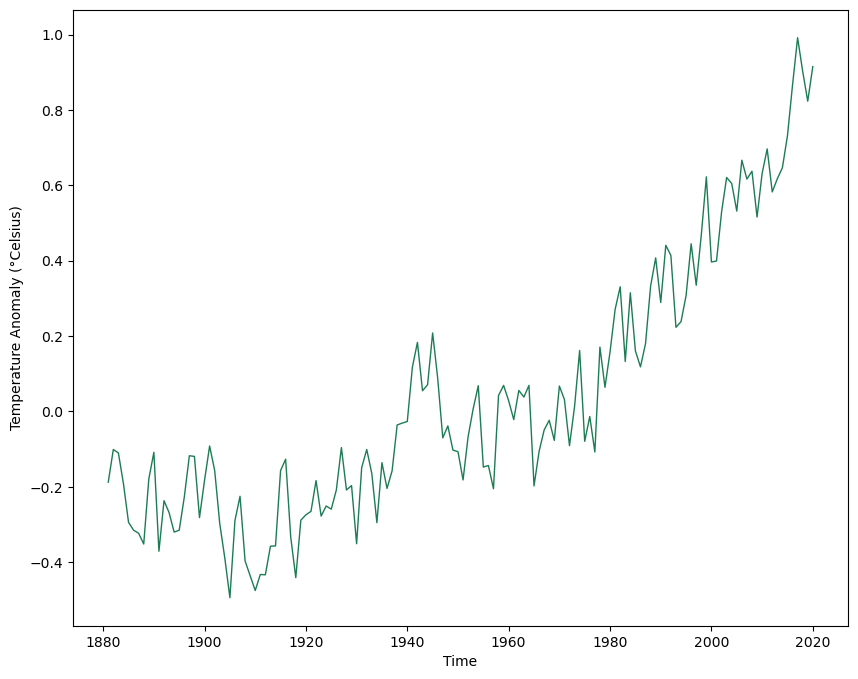

In [22]:
# Now lets visualize our resampled DataFrame

# Import Matplotlib
import matplotlib.pyplot as plt
# Allow for rendering within notebook
%matplotlib inline
# Create figure, title and plot resampled data
plt.figure(figsize=(10,8))
plt.xlabel('Time')
plt.ylabel('Temperature Anomaly (°Celsius)')
plt.plot(temp_chg.resample('A').mean(), color='#1C7C54', linewidth=1.0)

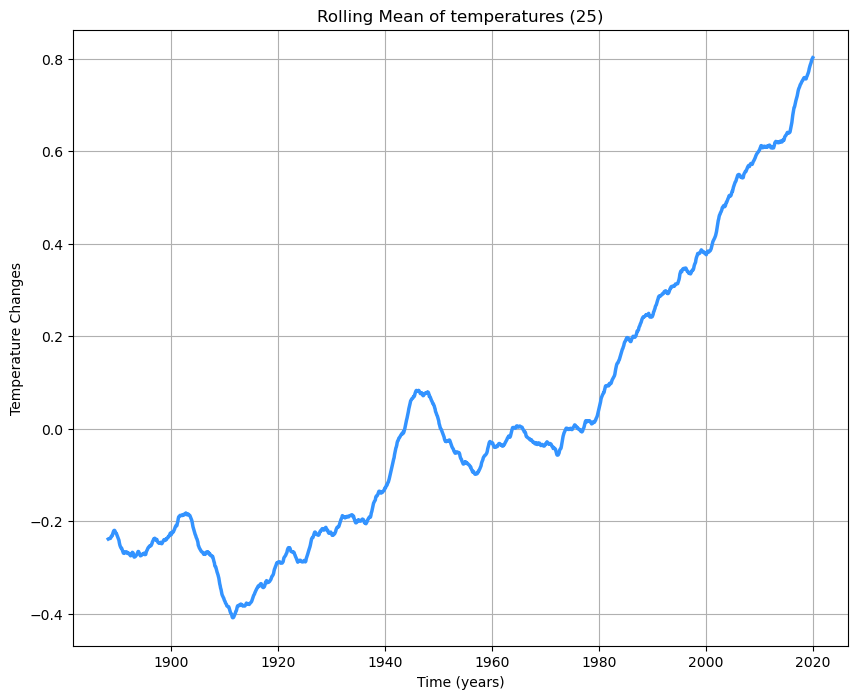

In [23]:
# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot co2 emissions data with specific colour and line thickness
ax.plot(temp_chg['Avg_Anomaly_deg_C'].rolling(100).mean(), color='#3393FF', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Temperature Changes',
       title='Rolling Mean of temperatures (25)')

# Enable grid
ax.grid()


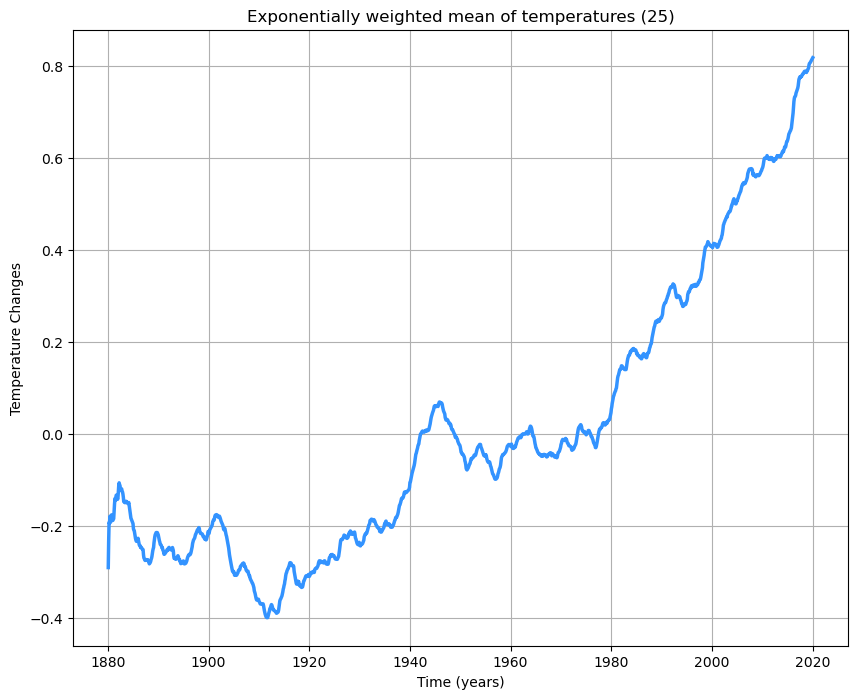

In [24]:
# Create figures and axes
fig, ax = plt.subplots(figsize=(10,8))

# Plot co2 emissions data with specific colour and line thickness
ax.plot(temp_chg['Avg_Anomaly_deg_C'].ewm(span=100).mean(), color='#3393FF', linewidth=2.5)

# Set axis labels and graph title
ax.set(xlabel='Time (years)', ylabel='Temperature Changes',
       title='Exponentially weighted mean of temperatures (25)')

# Enable grid
ax.grid()

## Wrangling Emissions

In [ ]:
raw_e

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,204.631696,208.837879,226.081890,214.785217,207.626699,185.213644,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.906060,0.922474,0.930816,0.940570,0.996033,1.047280,...,1.021646,1.031833,1.041145,0.987393,0.971016,0.959978,0.933541,NaN,NaN,NaN
2,Afghanistan,AFG,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.046057,0.053589,0.073721,0.074161,0.086174,0.101285,...,0.335351,0.263716,0.234037,0.232176,0.208857,0.203328,0.200151,NaN,NaN,NaN
3,Africa Western and Central,AFW,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.090880,0.095283,0.096612,0.112376,0.133258,0.184803,...,0.490867,0.504655,0.507671,0.480743,0.472959,0.476438,0.515544,NaN,NaN,NaN
4,Angola,AGO,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.100835,0.082204,0.210533,0.202739,0.213562,0.205891,...,1.204799,1.261542,1.285365,1.260921,1.227703,1.034317,0.887380,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,"Yemen, Rep.",YEM,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,0.011038,0.013599,0.012729,0.014518,0.017550,0.017926,...,0.804146,1.047834,1.034330,0.536269,0.400468,0.361418,0.326682,NaN,NaN,NaN
263,South Africa,ZAF,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,5.727223,5.832621,5.887168,5.961337,6.332343,6.616545,...,8.076633,8.137333,8.213158,7.671202,7.564451,7.632729,7.496645,NaN,NaN,NaN
264,Zambia,ZMB,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,NaN,NaN,NaN,NaN,0.946606,1.096875,...,0.277909,0.284058,0.311693,0.319282,0.341615,0.414748,0.446065,NaN,NaN,NaN


In [ ]:
raw_e[raw_e['Country Name']=='World']

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
259,World,WLD,CO2 emissions (metric tons per capita),EN.ATM.CO2E.PC,3.121158,3.06809,3.114839,3.221195,3.324046,3.432395,...,4.578768,4.610229,4.560774,4.48877,4.436759,4.441309,4.483524,NaN,NaN,NaN


### Activity

Extract the record that has world data and keep only the columns 1960 to 2019
Form a new table named emissions that looks like :

<img src="https://github.com/usm-cos422-522/courseMaterials/raw/main/Lectures/img/EmissionsTable.png">


#### Activity

display all emissions after the year 2006


#### Activity

display emissions between November 21, 1985 to Jan 4th, 2001


#### Activity
 Make a plot of emissions that looks like :
<img src="https://github.com/usm-cos422-522/courseMaterials/raw/main/Lectures/img/EmissionsPlot.png">



#### Activity

Create a plot of rolling mean with window size = 25


#### Activity

Create a plot of exponentially weighted mean with a window span of 15


#### Activity

Resample the temp_chg to calculate the mean for each year. After, select only those records from
'1960-12-31' to '2018-12-31'   Save the results (will use in next activity)

Verify emmissions and the results have the same number of records.

#### Activity

Calculate the correlation (.corr) between the emissions and temp_change. You will need to select the appropriate column by name from each of the two dataframes

###  DATA MATTERS!

I hope you were surprised by the result given above. It seems there is little correlation
between emissions and temperature change. Important to stop and reflect.

We threw away a lot of temperature date to match the time frame for emissions. i read in another
emissions dataset from https://ourworldindata.org/co2-emissions that has a lot more date

In [7]:
data_url = 'https://github.com/usm-cos422-522/courseMaterials/raw/main/data/annual-co2-emissions-per-country.csv'
raw_e2 = pd.read_csv(data_url)

emissions_v2 = raw_e2[raw_e2['Entity'] == 'World']
emissions_v2.index = [datetime(y, 12, 31) for y in emissions_v2['Year']]
emissions_v2 = pd.DataFrame(emissions_v2['Annual CO2 emissions'])
emissions_v2.head()

,Annual CO2 emissions
1750-12-31,9350528
1751-12-31,9350528
1752-12-31,9354192
1753-12-31,9354192
1754-12-31,9357856


#### Activity

With this new data, recompute the correlation on the larger dataset. It may help to plot it before you do so but it is not necessary. Again, make sure you have the same number of records in the subset dataframes.